# Exploratory Data Analysis (EDA)

## Import Dependenices and Custom Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.data_loader import DataLoader
from scripts.data_analysis import DataAnalysis
from scripts.data_visualize import DataVisualize

In [2]:
# Loads a dataset from a text file and saves it as a CSV file.
# dataLoader = DataLoader()
# df = dataLoader.load_and_save_as_csv('../data/MachineLearningRating_v3.txt')

df = pd.read_csv('../data/MachineLearningRating_v3.csv')

dataAnalysis = DataAnalysis(df)
dataVisualize = DataVisualize(df)

C:\Users\user\AppData\Local\Temp\ipykernel_10504\1472265654.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv')


In [3]:
# List the columns of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [4]:
# List the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)


Shape of the DataFrame:
(1000098, 52)


In [5]:
# Check duplicate values
print("Check for duplicate values:")
print(df.duplicated().sum())

Check for duplicate values:
0


- The number of rows is 10000098 and the number of columns is 52 with no duplicate value

## Data Understanding

### Insurance Policy

In [6]:
# List the columns overview for insurance policies
insurance_policy_columns = [ 'UnderwrittenCoverID', 'PolicyID']

dataAnalysis.columns_overview(insurance_policy_columns)

The first 5 rows
   UnderwrittenCoverID  PolicyID
0               145249     12827
1               145249     12827
2               145249     12827
3               145255     12827
4               145255     12827
----------------------------------
The last 5 rows
         UnderwrittenCoverID  PolicyID
1000093                31520       389
1000094                31520       389
1000095                31520       389
1000096                31519       389
1000097                31519       389
----------------------------------
The date type of the columns:
UnderwrittenCoverID    int64
PolicyID               int64
dtype: object
----------------------------------
The count of unique values in the columns:
UnderwrittenCoverID    116532
PolicyID                 7000
dtype: int64
----------------------------------
Check for missing values:
UnderwrittenCoverID    0
PolicyID               0
dtype: int64


The **Insurance Policy** columns are UnderwrittenCoverID and PolicyID.
- **UnderwrittenCoverID**: Unique identifier for a specific insurance coverage with **116532** unique values.
- **PolicyID**: Identifier for an entire insurance policy with **7000** unique values.
- The columns are **integer**.
- **No missing values** in both columns.
- PolicyID is many-to-one: each policy covers multiple UnderwrittenCoverIDs.

### Transaction Date

In [7]:
# List the column overview for transaction date
dataAnalysis.columns_overview('TransactionMonth')

The first 5 rows
0    2015-03-01 00:00:00
1    2015-05-01 00:00:00
2    2015-07-01 00:00:00
3    2015-05-01 00:00:00
4    2015-07-01 00:00:00
Name: TransactionMonth, dtype: object
----------------------------------
The last 5 rows
1000093    2015-04-01 00:00:00
1000094    2015-06-01 00:00:00
1000095    2015-08-01 00:00:00
1000096    2014-07-01 00:00:00
1000097    2015-02-01 00:00:00
Name: TransactionMonth, dtype: object
----------------------------------
The date type of the columns:
object
----------------------------------
The count of unique values in the columns:
23
----------------------------------
Check for missing values:
0


In [8]:
# Convert the 'TransactionMonth' column to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='mixed')
df['TransactionMonth'] = df['TransactionMonth'].dt.strftime('%Y-%m-%d')

In [9]:
# List of unique Months in the dataset
print("\n23 Months in the dataset:")
dataAnalysis.show_unique_values('TransactionMonth')


23 Months in the dataset:


['2013-10-01',
 '2013-11-01',
 '2013-12-01',
 '2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01',
 '2014-07-01',
 '2014-08-01',
 '2014-09-01',
 '2014-10-01',
 '2014-11-01',
 '2014-12-01',
 '2015-01-01',
 '2015-02-01',
 '2015-03-01',
 '2015-04-01',
 '2015-05-01',
 '2015-06-01',
 '2015-07-01',
 '2015-08-01']

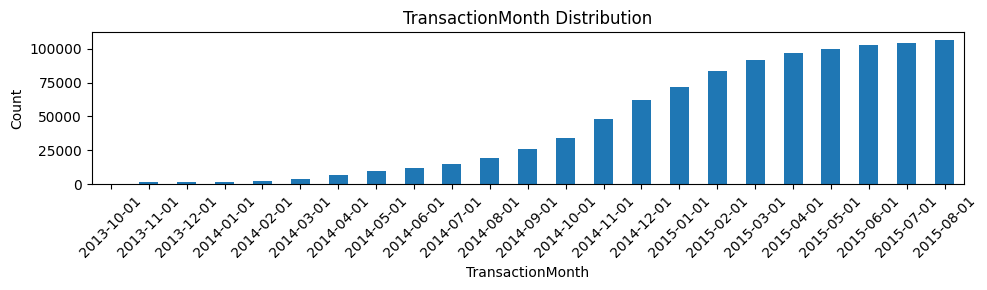

In [10]:
# Plot the transaction month distribution
dataVisualize.plot_value_counts_distributions('TransactionMonth')

The **Transaction Date** column is TransactionMonth.
- **TransactionMonth**: Month the transaction occurred with **23** unique values.
- Intialy the column was **object**, now changed to **datetime** format.
- **No missing values** in the column.
- The date is from October 2013 to August 2015.
- There is an increase of transation over time.

### Columns about the client

In [11]:
# List the columns overview for client information
client_columns = [ 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender']

dataAnalysis.columns_overview(client_columns)

The first 5 rows
   IsVATRegistered Citizenship          LegalType Title Language  \
0             True              Close Corporation    Mr  English   
1             True              Close Corporation    Mr  English   
2             True              Close Corporation    Mr  English   
3             True              Close Corporation    Mr  English   
4             True              Close Corporation    Mr  English   

                  Bank      AccountType  MaritalStatus         Gender  
0  First National Bank  Current account  Not specified  Not specified  
1  First National Bank  Current account  Not specified  Not specified  
2  First National Bank  Current account  Not specified  Not specified  
3  First National Bank  Current account  Not specified  Not specified  
4  First National Bank  Current account  Not specified  Not specified  
----------------------------------
The last 5 rows
         IsVATRegistered Citizenship   LegalType Title Language       Bank  \
1000093      

In [12]:
# List the unique values in the client information columns
print("\nUnique values in client information columns:")
dataAnalysis.show_unique_values(client_columns)


Unique values in client information columns:


{'IsVATRegistered': array([ True, False]),
 'Citizenship': array(['  ', 'AF', 'ZA', 'ZW'], dtype=object),
 'LegalType': array(['Close Corporation', 'Individual', 'Partnership',
        'Private company', 'Public company', 'Sole proprieter'],
       dtype=object),
 'Title': array(['Mr', 'Dr', 'Miss', 'Mrs', 'Ms'], dtype=object),
 'Language': array(['English'], dtype=object),
 'Bank': array(['First National Bank', 'Standard Bank', nan, 'ABSA Bank',
        'Capitec Bank', 'Nedbank', 'FirstRand Bank', 'Investec Bank',
        'Ithala Bank', 'Old Mutual', 'Mercantile Lisbon Bank',
        'RMB Private Bank'], dtype=object),
 'AccountType': array(['Current account', 'Savings account', nan, 'Transmission account'],
       dtype=object),
 'MaritalStatus': array(['Not specified', 'Married', 'Single', nan], dtype=object),
 'Gender': array(['Not specified', 'Male', 'Female', nan], dtype=object)}

In [13]:
# Fill '  ' values in 'Citizenship' with 'Not specified'
df.loc[(df['Citizenship'] == '  '), 'Citizenship'] = 'Not specified'

In [14]:
# Drop a column from the DataFrame since it has same value
df = df.drop('Language', axis=1)

In [15]:
# Fill missing values in 'Bank' &  'AccountType' with 'Not specified'
df.loc[(df['Bank'].isna()), 'Bank'] = 'Not specified'
print(f"Remaining missing bank values: {df['Bank'].isna().sum()}")

df.loc[(df['AccountType'].isna()), 'AccountType'] = 'Not specified'
print(f"Remaining missing AccountType values: {df['AccountType'].isna().sum()}")

Remaining missing bank values: 0
Remaining missing AccountType values: 0


In [16]:
# Define title-maritalStatus mappings
title_maritalStatus_map = {
    'Mrs': 'Married',
    'Miss': 'Single'
}

missing_before = df['MaritalStatus'].isna().sum()
not_specified_before = len(df[df['MaritalStatus'] == 'Not specified'])

# Apply mappings where Gender is missing/unspecified
for title, maritalStatus in title_maritalStatus_map.items():
    df.loc[(df['Title'] == title) & 
           (df['MaritalStatus'].isna() | (df['MaritalStatus'] == 'Not specified')), 
           'MaritalStatus'] = maritalStatus
    
    
missing_after = df['MaritalStatus'].isna().sum()
not_specified_after = len(df[df['MaritalStatus'] == 'Not specified'])

print(f"Filled {missing_before - missing_after} missing maritalStatus values")
print(f"Filled {not_specified_before - not_specified_after} Not specified maritalStatus values")

# Fill remaining missing values in 'MaritalStatus' with 'Not specified'
df.loc[(df['MaritalStatus'].isna()), 'MaritalStatus'] = 'Not specified'

missing_after_filling = df['MaritalStatus'].isna().sum()
print(f"Filled {missing_after} missing maritalStatus values")
print(f"Remaining missing maritalStatus values: {missing_after_filling}")

Filled 0 missing maritalStatus values
Filled 51740 Not specified maritalStatus values
Filled 8259 missing maritalStatus values
Remaining missing maritalStatus values: 0


In [17]:
# Define title-gender mappings
title_gender_map = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Miss': 'Female',
    'Ms': 'Female'
}

missing_before = df['Gender'].isna().sum()
not_specified_before = len(df[df['Gender'] == 'Not specified'])

# Apply mappings where Gender is missing/unspecified
for title, gender in title_gender_map.items():
    df.loc[(df['Title'] == title) & 
           (df['Gender'].isna() | (df['Gender'] == 'Not specified')), 
           'Gender'] = gender
    
missing_after = df['Gender'].isna().sum()
not_specified_after = len(df[df['Gender'] == 'Not specified'])


print(f"Filled {missing_before - missing_after} missing gender values")
print(f"Filled {not_specified_before - not_specified_after} Not specified gender values")
print(f"Remaining missing gender values: {missing_after}")

Filled 9536 missing gender values
Filled 940180 Not specified gender values
Remaining missing gender values: 0


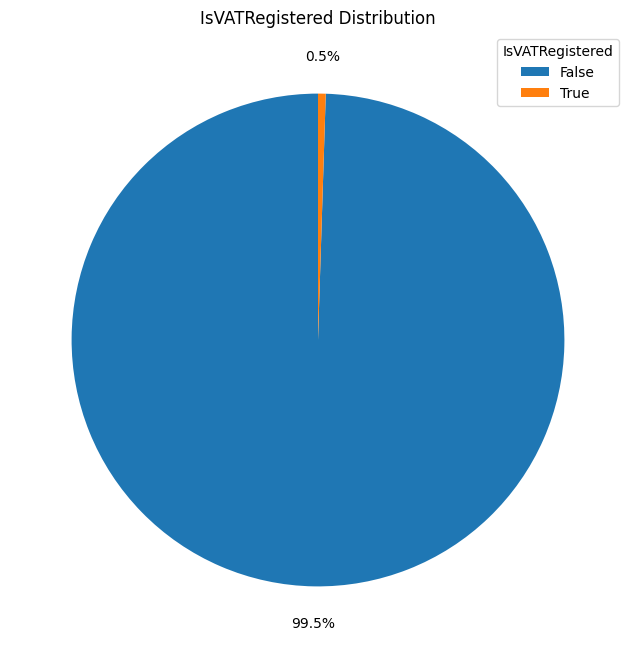

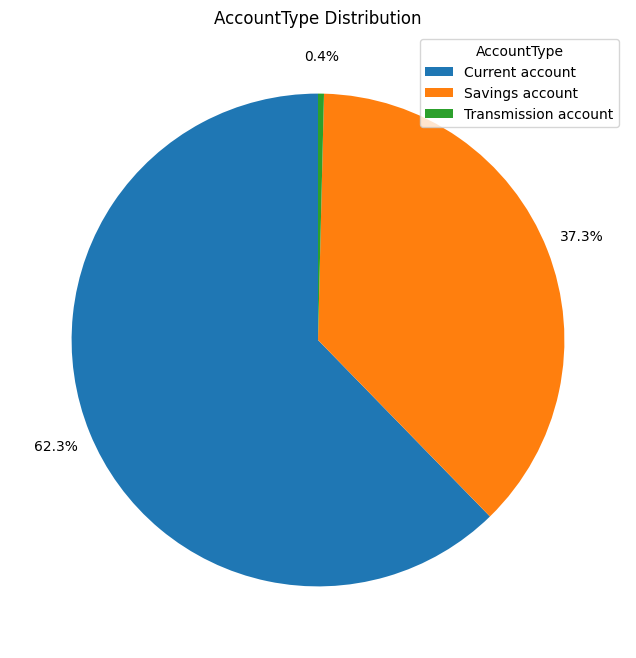

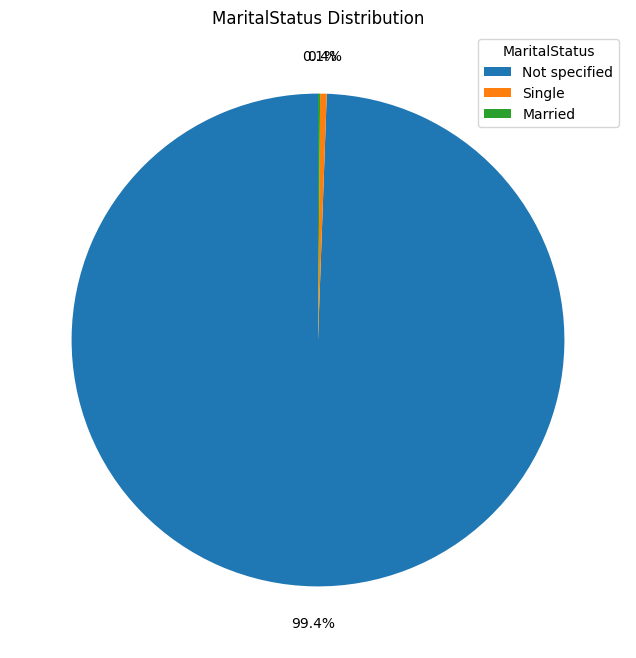

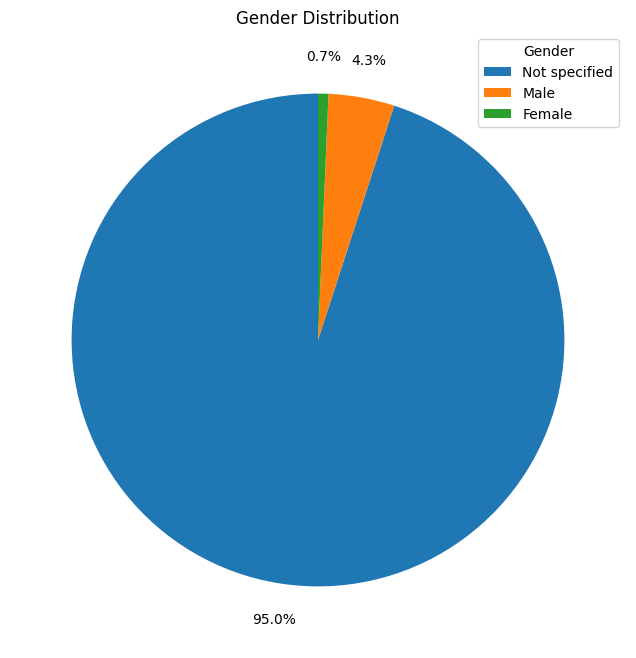

In [18]:
# Plot pie chart for some of client_columns
plot_pie = [ 'IsVATRegistered', 'AccountType', 'MaritalStatus', 'Gender']

dataVisualize.plot_pie_chart(plot_pie)

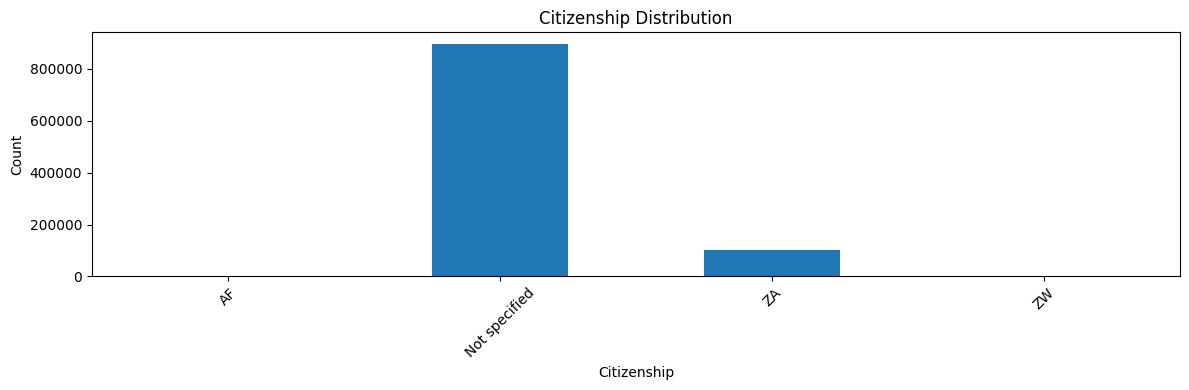

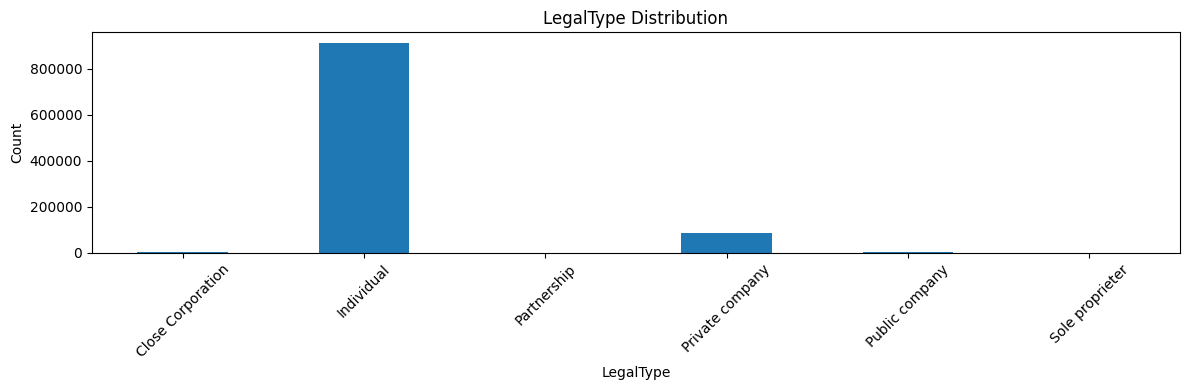

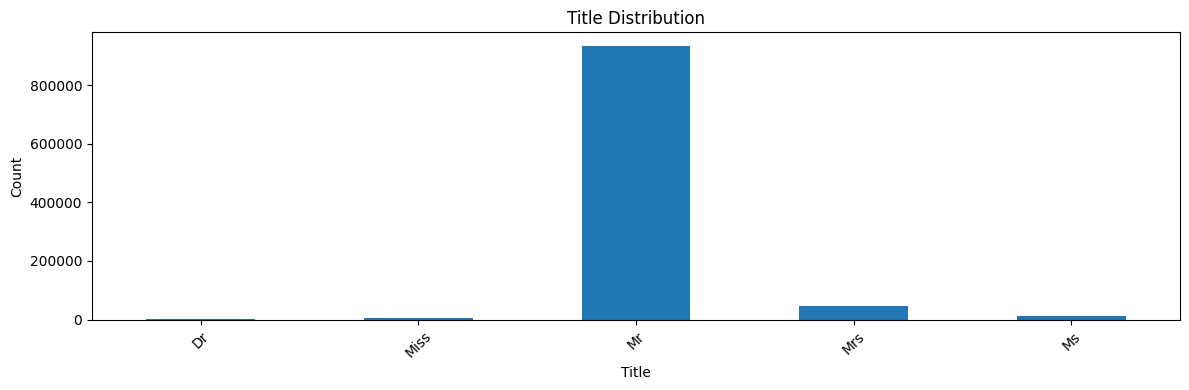

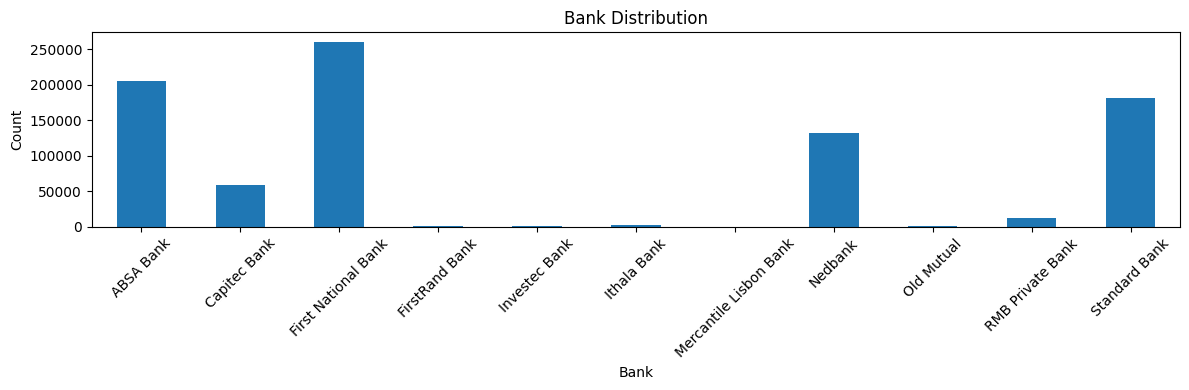

In [19]:
# plot bar chart for some of client_columns
client_columns_filtered = [ 'Citizenship', 'LegalType', 'Title', 'Bank']

dataVisualize.plot_value_counts_distributions(client_columns_filtered, figsize=(12, 8))

The **Client Information** columns are IsVATRegistered, Citizenship, LegalType, Title, Language,
       Bank, AccountType, MaritalStatus and Gender.
- **IsVATRegistered**: indicates business registration for tax occurred with **2** unique values.
    - **Values:** True(0.5%), False(99.5%)
- **Citizenship**: **4** unique values.
    - **Values:** 'Not specified' used to be '  '(highest), 'AF', 'ZA', 'ZW'
- **LegalType**: **6** unique values.
    - **Values:** 'Close Corporation', 'Individual'(highest), 'Partnership',
        'Private company', 'Public company', 'Sole proprieter'
- **Title**: **5** unique values.
    - **Values:** 'Mr'(highest), 'Dr', 'Miss', 'Mrs', 'Ms'
- **Language**: **1** unique values which is dropped because it has the same value.
    - All of the **Value** of the column is English.
- **Bank**: **11** unique values.
    - Highest value is First National Bank
- **AccountType**: **3** unique values added **1** column.
    - **Values:** 'Current account'(highest), 'Savings account', 'Not specified', 'Transmission account'
- **MaritalStatus**: **3** unique values.
    - **Values:** 'Not specified'(highest), 'Married', 'Single'
- **Gender**: **3** unique values.
    - **Values:** 'Not specified', 'Male'(highest), 'Female'
- IsVATRegistered is **boolean** data type but the remaining columns are **object** datatype
- There were **missing value** in columns: 
    - Bank and AccountType filled with Unknown. 
    - MaritalStatus and Gender filled with Not specified.

### Client Location

In [20]:
# List the columns overview for client location information
client_location_columns = [ 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']

dataAnalysis.columns_overview(client_location_columns)

The first 5 rows
        Country Province  PostalCode MainCrestaZone SubCrestaZone
0  South Africa  Gauteng        1459      Rand East     Rand East
1  South Africa  Gauteng        1459      Rand East     Rand East
2  South Africa  Gauteng        1459      Rand East     Rand East
3  South Africa  Gauteng        1459      Rand East     Rand East
4  South Africa  Gauteng        1459      Rand East     Rand East
----------------------------------
The last 5 rows
              Country      Province  PostalCode  \
1000093  South Africa  Western Cape        7493   
1000094  South Africa  Western Cape        7493   
1000095  South Africa  Western Cape        7493   
1000096  South Africa  Western Cape        7493   
1000097  South Africa  Western Cape        7493   

                           MainCrestaZone    SubCrestaZone  
1000093  Karoo 1 (Northeast of Cape Town)  Northeast of CT  
1000094  Karoo 1 (Northeast of Cape Town)  Northeast of CT  
1000095  Karoo 1 (Northeast of Cape Town)  Nor

In [21]:
# List the unique values in the client information columns
client_location_columns_without_PostalCode = [col for col in client_location_columns if col != 'PostalCode']
print("\nUnique values in client location information columns:")
dataAnalysis.show_unique_values(client_location_columns_without_PostalCode)


Unique values in client location information columns:


{'Country': array(['South Africa'], dtype=object),
 'Province': array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape',
        'Western Cape', 'Limpopo', 'North West', 'Free State',
        'Northern Cape'], dtype=object),
 'MainCrestaZone': array(['Rand East', 'Transvaal (all except Pretoria)', 'Johannesburg',
        'Natal (Durban)', 'Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1',
        'Transvaal (Pretoria)', 'Natal', 'Cape Province (Cape Town)',
        'Langkloof, Coast 2, Coast 1',
        'Cape Province (East and North of Cape Town)', 'Oranje Free State',
        'East London', 'Port Elizabeth', 'Ciskei, Cape Mid 1',
        'Cape Province', 'Karoo 1 (Northeast of Cape Town)'], dtype=object),
 'SubCrestaZone': array(['Rand East', 'Transvaal South', 'Johannesburg', 'Durban',
        'Transvaal South East', 'Cape Mid West', 'Pretoria', 'Rand West',
        'North Coast', 'Cape Town', 'Transvaal North', 'Langkloof',
        'Transvaal North West', 'Transvaal East', 'Eas

In [22]:
# Drop a column from the DataFrame since it has same value
df = df.drop('Country', axis=1)

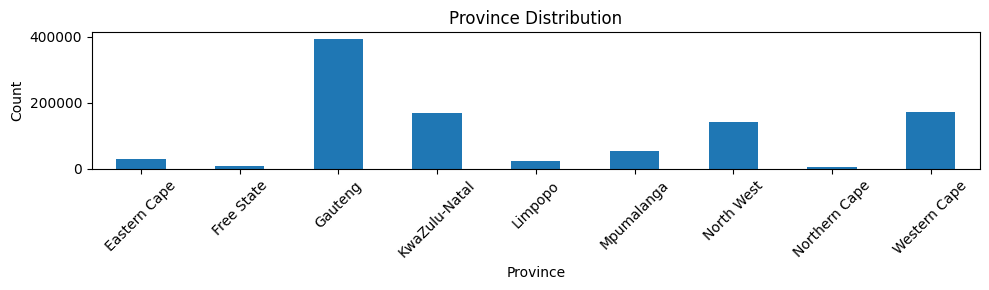

In [23]:
dataVisualize.plot_value_counts_distributions('Province')

The **Client Location** columns are 'Country', 'Province', 'PostalCode', 'MainCrestaZone' and 'SubCrestaZone'.
- **Country**: South Africa with **1** unique values so it was dropped.
- **Provice**: **9** unique values with Gauteng the highest count.
- The columns are **object** except **PostalCode** which is integer.
- **No missing values** in all columns.

### Car Insured

In [24]:
# List the columns overview for  car insured information
car_insured_columns = [ 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors']

dataAnalysis.columns_overview(car_insured_columns)

The first 5 rows
           ItemType      mmcode        VehicleType  RegistrationYear  \
0  Mobility - Motor  44069150.0  Passenger Vehicle              2004   
1  Mobility - Motor  44069150.0  Passenger Vehicle              2004   
2  Mobility - Motor  44069150.0  Passenger Vehicle              2004   
3  Mobility - Motor  44069150.0  Passenger Vehicle              2004   
4  Mobility - Motor  44069150.0  Passenger Vehicle              2004   

            make  Model  Cylinders  cubiccapacity  kilowatts bodytype  \
0  MERCEDES-BENZ  E 240        6.0         2597.0      130.0      S/D   
1  MERCEDES-BENZ  E 240        6.0         2597.0      130.0      S/D   
2  MERCEDES-BENZ  E 240        6.0         2597.0      130.0      S/D   
3  MERCEDES-BENZ  E 240        6.0         2597.0      130.0      S/D   
4  MERCEDES-BENZ  E 240        6.0         2597.0      130.0      S/D   

   NumberOfDoors  
0            4.0  
1            4.0  
2            4.0  
3            4.0  
4            4.0

In [25]:
car_insured_columns = [ 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']

dataAnalysis.columns_overview(car_insured_columns)

The first 5 rows
  VehicleIntroDate  CustomValueEstimate AlarmImmobiliser TrackingDevice  \
0           6/2002             119300.0              Yes             No   
1           6/2002             119300.0              Yes             No   
2           6/2002             119300.0              Yes             No   
3           6/2002             119300.0              Yes             No   
4           6/2002             119300.0              Yes             No   

  CapitalOutstanding          NewVehicle WrittenOff Rebuilt Converted  \
0             119300  More than 6 months        NaN     NaN       NaN   
1             119300  More than 6 months        NaN     NaN       NaN   
2             119300  More than 6 months        NaN     NaN       NaN   
3             119300  More than 6 months        NaN     NaN       NaN   
4             119300  More than 6 months        NaN     NaN       NaN   

  CrossBorder  NumberOfVehiclesInFleet  
0         NaN                      NaN  
1         N

In [26]:
# List the unique values in the car insured information columns
some_car_insured_columns = [ 'ItemType', 'VehicleType', 'RegistrationYear', 
        'make', 'Cylinders', 'bodytype', 'NumberOfDoors', 'AlarmImmobiliser',
       'TrackingDevice', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder']
print("\nUnique values in car insured information columns:")
dataAnalysis.show_unique_values(some_car_insured_columns)


Unique values in car insured information columns:


{'ItemType': array(['Mobility - Motor'], dtype=object),
 'VehicleType': array(['Passenger Vehicle', 'Medium Commercial', 'Heavy Commercial',
        'Light Commercial', 'Bus', nan], dtype=object),
 'RegistrationYear': array([2004, 2006, 2009, 2011, 2007, 2014, 2010, 2013, 2008, 2015, 2012,
        2005, 1998, 1995, 2000, 2003, 1999, 2001, 1997, 1994, 2002, 1996,
        1992, 1987, 1988]),
 'make': array(['MERCEDES-BENZ', 'VOLKSWAGEN', 'RENAULT', 'FORD', 'BMW', 'AUDI',
        'VOLVO', 'PROTON', 'TOYOTA', 'NISSAN/DATSUN                      ',
        'CMC', 'MERCEDES-BENZ                      ', 'C.A.M', 'POLARSUN',
        'NISSAN', 'IVECO', 'FIAT', 'TOYOTA                             ',
        'JINBEI', 'HYUNDAI', 'GOLDEN JOURNEY', 'KIA', 'MITSUBISHI', 'TATA',
        'MAZDA', 'CITROEN                            ', 'FOTON', 'B.A.W',
        'PEUGEOT', 'JINBEI                             ',
        'SUZUKI                             ',
        'CHERY                              ',

In [27]:
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])
# Replace comma with dot and convert to float
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '.')
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'])


C:\Users\user\AppData\Local\Temp\ipykernel_10504\288970683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


In [28]:
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'])
df['CapitalOutstanding'].nunique()

353

In [29]:
df['Cylinders'] = df['Cylinders'].astype('Int64')
df['NumberOfDoors'] = df['NumberOfDoors'].astype('Int64')

In [30]:
# df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median(), inplace=True)
# df[['WrittenOff', 'Rebuilt', 'Converted']] = df[['WrittenOff', 'Rebuilt', 'Converted']].fillna('Not specified')


In [31]:
# Remove any trailing space
df['make'] = df['make'].str.strip()
df['Model'] = df['Model'].str.strip()

df['make'].unique()

array(['MERCEDES-BENZ', 'VOLKSWAGEN', 'RENAULT', 'FORD', 'BMW', 'AUDI',
       'VOLVO', 'PROTON', 'TOYOTA', 'NISSAN/DATSUN', 'CMC', 'C.A.M',
       'POLARSUN', 'NISSAN', 'IVECO', 'FIAT', 'JINBEI', 'HYUNDAI',
       'GOLDEN JOURNEY', 'KIA', 'MITSUBISHI', 'TATA', 'MAZDA', 'CITROEN',
       'FOTON', 'B.A.W', 'PEUGEOT', 'SUZUKI', 'CHERY', 'SAIC', 'JMC',
       'HINO', 'HONDA', 'CHEVROLET', nan, 'OPEL', 'MAHINDRA', 'DAIHATSU',
       'GEELY', 'SCANIA', 'LEXUS', 'HUMMER', 'MARCOPOLO'], dtype=object)

In [32]:
cols_552 = [
    'mmcode', 'VehicleType', 'make', 'Model', 'Cylinders',
    'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
    'VehicleIntroDate'
]
missing_together = df[cols_552].isnull().all(axis=1)
print("Number of rows with all 552-value columns missing:", missing_together.sum())
missing_df = df[missing_together]

missing_df.head()


Number of rows with all 552-value columns missing: 552


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
487033,74751,3844,2015-02-01,False,Not specified,Individual,Mr,Nedbank,Savings account,Not specified,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
512140,74753,3844,2014-10-01,False,Not specified,Individual,Mr,Nedbank,Savings account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.521842,0.0
512141,74753,3844,2014-12-01,False,Not specified,Individual,Mr,Nedbank,Savings account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
512142,74753,3844,2015-03-01,False,Not specified,Individual,Mr,Nedbank,Savings account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
512143,74753,3844,2015-05-01,False,Not specified,Individual,Mr,Nedbank,Savings account,Not specified,...,No excess,Signage and Vehicle Wraps,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [33]:
# Drop a column from the DataFrame since it has same value, nearly no value and no value
df.drop(columns=['ItemType', 'CrossBorder', 'NumberOfVehiclesInFleet'], inplace=True)

The **Car Insured** columns are 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder' and 'NumberOfVehiclesInFleet'.
- **ItemType**: Mobility - Motor with **1** unique values which was dropped due to have one value.
- **Provice**: **9** unique values with Gauteng the highest count.
- The columns are **object** except **PostalCode** which is integer.
- 
- **Missing values** in columns: 
- All value is **missing** in column **NumberOfVehiclesInFleet** which was dropped.